<a href="https://colab.research.google.com/github/mks2607/Data_mks/blob/mks2607/imdb_Top_250_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Разархивировали файл из зип архива в папку

In [3]:
import zipfile
import os

zip_fale = '/content/archive.zip'

with zipfile.ZipFile(zip_fale,'r') as df:
  df.extractall('extracted_folder')

# Импорт в колаб для чтения файла

In [7]:
df = pd.read_csv('/content/extracted_folder/imdb_Top_250_TV_Shows.csv')

In [8]:
df

,Shows Name,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62 eps,9.5,(2.2M)
1,Planet Earth II,2016,6 eps,9.5,(163K)
2,Planet Earth,2006,11 eps,9.4,(224K)
3,Band of Brothers,2001,10 eps,9.4,(547K)
4,Chernobyl,2019,5 eps,9.3,(912K)
...,...,...,...,...,...
245,Umbre,2014–2019,21 eps,8.7,(12K)
246,Foyle's War,2002–2015,28 eps,8.6,(19K)
247,Gintama,2005–2021,375 eps,8.7,(17K)
248,The Great British Baking Show,2010–,189 eps,8.6,(13K)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Shows Name              250 non-null    object 
 1   Release Year            250 non-null    object 
 2   Episodes                250 non-null    object 
 3   Rating                  250 non-null    float64
 4   Rating given by people  250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


# Задачи для решения EDA(исследовтельский анализ данны)
  1. Отсотрировать - 10 самых востребованных фильмов по рейтингу.
  2. ТОП 5 фильмов/сериалов по количеству просмотров
  3. В какие периоды времени снять больше всего фильмов.

# Преобразование столбцов в нужный формат

In [10]:
df['Rating given by people'] = df['Rating given by people'].astype(str).str.replace('(','',regex=False)
df['Rating given by people'] = df['Rating given by people'].astype(str).str.replace(')','',regex=False)

In [12]:
df['Rating given by people'] = df['Rating given by people'].astype(str).str.replace('K','000',regex=False)

смотрим есть ли значения не float в списке

In [22]:
column_values = df['Rating given by people'].tolist()
print(column_values)

[2200000, 163000, 224000, 547000, 912000, 392000, 392000, 49000, 501000, 132000, 46000, 54000, 2400000, 34000, 32000, 210000, 629000, 44000, 161000, 98000, 30000, 1000000, 567000, 123000, 342000, 695000, 749000, 44000, 67000, 162000, 29000, 34000, 151000, 287000, 59000, 403000, 20000, 148000, 362000, 29000, 30000, 147000, 679000, 435000, 50000, 41000, 26000, 16000, 23000, 144000, 18000, 98000, 1100000, 298000, 260000, 74000, 29000, 89000, 273000, 81000, 153000, 35000, 201000, 52000, 103000, 98000, 156000, 59000, 157000, 95000, 99000, 223000, 92000, 74000, 487000, 51000, 25000, 87000, 20000, 39000, 86000, 663000, 415000, 77000, 376000, 14000, 685000, 155000, 191000, 79000, 110000, 11000, 470000, 60000, 584000, 217000, 231000, 91000, 180000, 132000, 231000, 82000, 88000, 446000, 269000, 69000, 539000, 141000, 330000, 195000, 740000, 223000, 185000, 22000, 52000, 25000, 25000, 1400000, 75000, 148000, 74000, 130000, 126000, 27000, 34000, 19000, 15000, 164000, 314000, 45000, 608000, 86000, 

In [19]:
# Функция для преобразования строкового значения в целое число
def convert_to_int(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1_000_000)
    return int(value)

# Применение функции к столбцу 'Rating'
df['Rating given by people'] = df['Rating given by people'].apply(convert_to_int)

In [23]:
print(df['Rating given by people'])

0      2200000
1       163000
2       224000
3       547000
4       912000
        ...   
245      12000
246      19000
247      17000
248      13000
249     300000
Name: Rating given by people, Length: 250, dtype: int64


In [24]:
print(type(df['Rating given by people']))

<class 'pandas.core.series.Series'>


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Shows Name              250 non-null    object 
 1   Release Year            250 non-null    object 
 2   Episodes                250 non-null    object 
 3   Rating                  250 non-null    float64
 4   Rating given by people  250 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB


In [33]:
df['Episodes'] = df['Episodes'].astype(str).str.replace(' eps','',regex=False)

In [34]:
df.head(5)

,Shows Name,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62,9.5,2200000
1,Planet Earth II,2016,6,9.5,163000
2,Planet Earth,2006,11,9.4,224000
3,Band of Brothers,2001,10,9.4,547000
4,Chernobyl,2019,5,9.3,912000


In [37]:
df['Episodes'] = df['Episodes'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Shows Name              250 non-null    object 
 1   Release Year            250 non-null    object 
 2   Episodes                250 non-null    int64  
 3   Rating                  250 non-null    float64
 4   Rating given by people  250 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


# Сортировка списка

In [54]:
df.sort_values(by='Rating',ascending=False)
df_top10_rating = df.head(10).copy()

In [51]:
df_top10_given = df.sort_values(by='Rating given by people',ascending=False).head(10).copy()

In [52]:
df_top10_given

,Shows Name,Release Year,Episodes,Rating,Rating given by people
12,Game of Thrones,2011–2019,74,9.2,2400000
0,Breaking Bad,2008–2013,62,9.5,2200000
117,Stranger Things,2016–2025,42,8.7,1400000
52,Friends,1994–2004,235,8.9,1100000
21,Sherlock,2010–2017,15,9.1,1000000
4,Chernobyl,2019,5,9.3,912000
138,Dexter,2006–2013,96,8.6,807000
26,The Office,2005–2013,188,9.0,749000
110,The Boys,2019–,40,8.7,740000
25,Better Call Saul,2015–2022,63,9.0,695000


<Axes: xlabel='Rating given by people'>

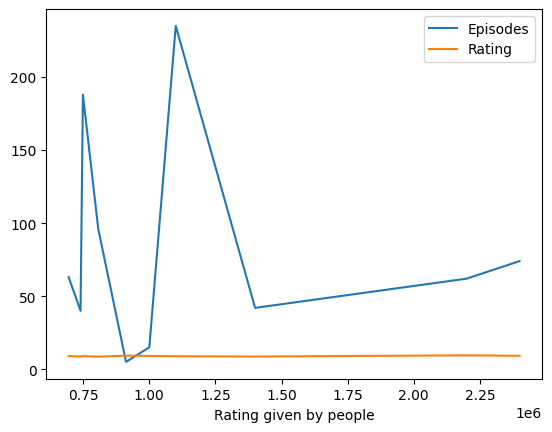

In [68]:
df_top10_given.plot('Rating given by people')

In [53]:
df_top10_rating

,Shows Name,Release Year,Episodes,Rating,Rating given by people
0,Breaking Bad,2008–2013,62,9.5,2200000
1,Planet Earth II,2016,6,9.5,163000
2,Planet Earth,2006,11,9.4,224000
3,Band of Brothers,2001,10,9.4,547000
4,Chernobyl,2019,5,9.3,912000
5,The Wire,2002–2008,60,9.3,392000
6,Avatar: The Last Airbender,2005–2008,62,9.3,392000
7,Blue Planet II,2017,7,9.3,49000
8,The Sopranos,1999–2007,86,9.2,501000
9,Cosmos: A Spacetime Odyssey,2014,13,9.2,132000


<Axes: >

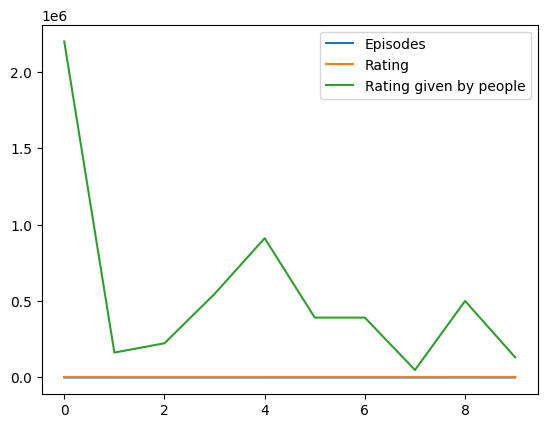

In [66]:
df_top10_rating.plot()

# Когда было снято больше всего фильмов

In [ ]:
# на след эфир